In [2]:
#Random forest Speed prediction

# import required libraries
import pandas as pd

In [3]:
#import and read dataset. Investigate 5 top rows
df = pd.read_csv('data_proc.csv')
df.head()

,Time,Forefoot,Midfoot,Heel,Total,Incline,Speed,Speed2
0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN
1,0.01,62.01,129.85,104.94,296.80,NaN,NaN,NaN
2,0.02,62.01,127.20,102.29,291.50,NaN,NaN,NaN
3,0.03,62.01,124.55,104.94,291.50,NaN,NaN,NaN
4,0.04,57.24,124.55,104.94,286.73,NaN,NaN,NaN


In [4]:
#remove rows with missing data
df = df.dropna()

In [5]:
df['Speed2']=df['Speed2'].replace('slow',0).replace('medium',1).replace('fast',2)

In [6]:
#separate the features (X) and the label
X = df.drop(["Time","Speed","Speed2"], axis=1)
y = df["Speed2"]

In [7]:
#training our random forest model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=900, max_features='sqrt', random_state=40)

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=900, random_state=40)

In [8]:
#make predictions with our model
predictions = rf_model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [9]:
predictions = rf_model.predict(X_test)

rf_model.predict_proba(X_test)

#show the order of the classes 
rf_model.classes_

array([0, 1, 2])

In [10]:
#show how important each feature during prediction
importances=rf_model.feature_importances_
columns=X.columns
i=0

while i<len(columns):
    print(f"The importance of feature' {columns[i]} 'is {round(importances[i]*100,2)}%.")
    i+=1

The importance of feature' Forefoot 'is 18.38%.
The importance of feature' Midfoot 'is 24.16%.
The importance of feature' Heel 'is 21.41%.
The importance of feature' Total 'is 26.58%.
The importance of feature' Incline 'is 9.47%.


              precision    recall  f1-score   support

           0       0.74      0.83      0.78      6999
           1       0.65      0.59      0.62      4493
           2       0.76      0.67      0.71      3705

    accuracy                           0.72     15197
   macro avg       0.72      0.70      0.71     15197
weighted avg       0.72      0.72      0.72     15197



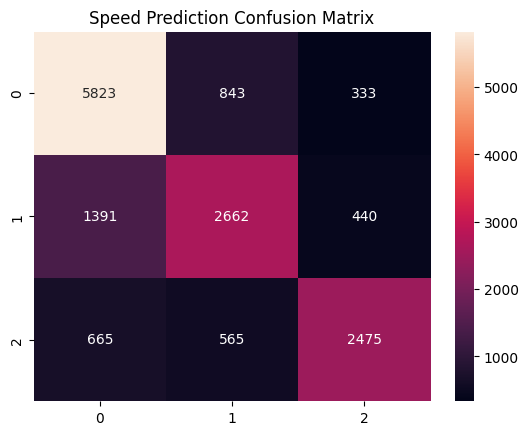

In [11]:
#evaluate the performance of our model
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

cm=confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True,fmt='d').set_title("Speed Prediction Confusion Matrix")

print(classification_report(y_test,predictions))

In [12]:
#check the performance of our model
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('Mean absolute error:',mean_absolute_error(y_test,predictions))
print('Mean squared error:',mean_squared_error(y_test,predictions))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predictions)))

Mean absolute error: 0.3444758833980391
Mean squared error: 0.4758175955780746
Root mean squared error: 0.6897953287592448


In [1]:
#Random forest Incline prediction
#import required libraries
import pandas as pd

In [2]:
#import and read dataset. Investigate 5 top rows
df = pd.read_csv('data_proc.csv')
df.head()

,Time,Forefoot,Midfoot,Heel,Total,Incline,Speed,Speed2
0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN
1,0.01,62.01,129.85,104.94,296.80,NaN,NaN,NaN
2,0.02,62.01,127.20,102.29,291.50,NaN,NaN,NaN
3,0.03,62.01,124.55,104.94,291.50,NaN,NaN,NaN
4,0.04,57.24,124.55,104.94,286.73,NaN,NaN,NaN


In [3]:
#remove rows with missing data
df = df.dropna()

In [4]:
df['Speed2']=df['Speed2'].replace('slow',0).replace('medium',1).replace('fast',2)

In [6]:
#separate the features (X) and the label
X = df.drop(["Time","Speed","Incline"], axis=1)
y = df["Incline"]

In [7]:
#training our random forest model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)



from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=900, max_features='sqrt', random_state=40)

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=900, random_state=40)

In [8]:
#make predictions with our model
y_pred = rf_model.predict(X_test)
y_pred

array([25.,  5., 10., ...,  5., 20., 25.])

In [9]:
y_pred = rf_model.predict(X_test)

rf_model.predict_proba(X_test)

#show the order of the classes 
rf_model.classes_

array([ 0.,  5., 10., 15., 20., 25.])

In [10]:
#show how important each feature during prediction
imp=rf_model.feature_importances_
col=X.columns
i=0

while i<len(col):
    print(f"The importance of feature' {col[i]} 'is {round(imp[i]*100,2)}%.")
    i+=1

The importance of feature' Forefoot 'is 21.44%.
The importance of feature' Midfoot 'is 24.25%.
The importance of feature' Heel 'is 21.06%.
The importance of feature' Total 'is 29.66%.
The importance of feature' Speed2 'is 3.59%.


              precision    recall  f1-score   support

         0.0       0.53      0.60      0.56      3391
         5.0       0.35      0.36      0.36      2571
        10.0       0.32      0.33      0.32      2333
        15.0       0.33      0.28      0.30      2129
        20.0       0.38      0.34      0.36      2333
        25.0       0.57      0.55      0.56      2440

    accuracy                           0.43     15197
   macro avg       0.41      0.41      0.41     15197
weighted avg       0.42      0.43      0.42     15197



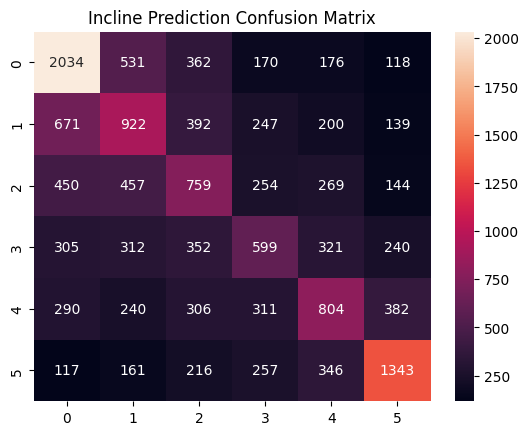

In [12]:
#evaluate the performance of our model
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='d').set_title("Incline Prediction Confusion Matrix")

print(classification_report(y_test,y_pred))